## INIT

In [6]:
import imageio
import cv2

def readImg(image_path, flags=3): 
    tmp = imageio.mimread(image_path)
    if tmp is None:
        return None
    imt = np.array(tmp)
    imt = imt[0]
    if imt.ndim == 3 and flags is not -1:
        im = imt[:, :, 0:3]
    else:
        im = imt
    return im

ModuleNotFoundError: No module named 'libs.util'

In [5]:
img = Image
pattern='rggb'

height, width = img.shape[:2]
_R = np.array([
    [pattern[0]=='r', pattern[1]=='r'], [pattern[2]=='r', pattern[3]=='r']], dtype=np.uint8)
_R = np.tile(_R, (height//2, width//2))

_G = np.array([[pattern[0]=='g', pattern[1]=='g'], [pattern[2]=='g', pattern[3]=='g']], dtype=np.uint8)
_G = np.tile(_G, (height//2, width//2))

_B = np.array([[pattern[0]=='b', pattern[1]=='b'], [pattern[2]=='b', pattern[3]=='b']], dtype=np.uint8)
_B = np.tile(_B, (height//2, width//2))

_R.shape

(512, 512)

## RGB to CFA


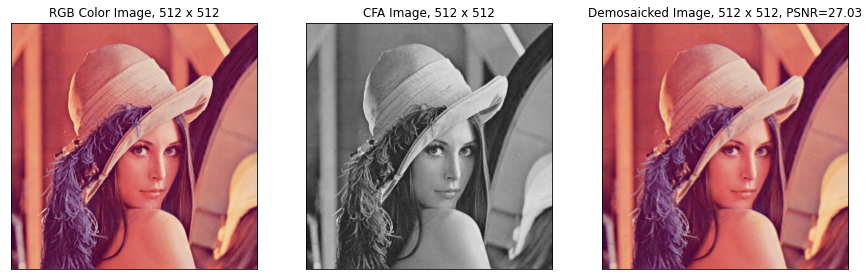

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb2cfa(img, pattern='rggb'):
    height, width = img.shape[:2]
    _R = np.array([
        [pattern[0]=='r', pattern[1]=='r'], 
        [pattern[2]=='r', pattern[3]=='r']
    ], dtype=np.uint8)
    _R = np.tile(_R, (height//2, width//2))

    _G = np.array([
        [pattern[0]=='g', pattern[1]=='g'], 
        [pattern[2]=='g', pattern[3]=='g']
    ], dtype=np.uint8)
    _G = np.tile(_G, (height//2, width//2))

    _B = np.array([
        [pattern[0]=='b', pattern[1]=='b'], 
        [pattern[2]=='b', pattern[3]=='b']
    ], dtype=np.uint8)
    _B = np.tile(_B, (height//2, width//2))

    _R*=img[:, :, 0]
    _G*=img[:, :, 1]
    _B*=img[:, :, 2]

    new_image = _R + _G + _B
    return new_image

def demosaicked(cfa, pattern='rggb'):
    height, width = cfa.shape[:2]
    _R = np.array([[pattern[0]=='r', pattern[1]=='r'], [pattern[2]=='r', pattern[3]=='r']], dtype=np.uint8)
    _R = np.tile(_R, (height//2, width//2))

    _G = np.array([[pattern[0]=='g', pattern[1]=='g'], [pattern[2]=='g', pattern[3]=='g']], dtype=np.uint8)
    _G = np.tile(_G, (height//2, width//2))

    _B = np.array([[pattern[0]=='b', pattern[1]=='b'], [pattern[2]=='b', pattern[3]=='b']], dtype=np.uint8)
    _B = np.tile(_B, (height//2, width//2))

    _R*=cfa
    _G*=cfa
    _B*=cfa
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            _R[i, j+1] = _R[i, j]
            _R[i+1, j] = _R[i, j]
            _R[i+1, j+1] = _R[i, j]

            _G[i, j] = _G[i, 1+j]
            _G[i+1, j+1] = _G[i, j-1]

            _B[i, j+1] = _B[i+1, j+1]
            _B[i+1, j] = _B[i+1, j+1]
            _B[i, j] = _B[i+1, j+1]

    new_image = np.zeros((height, width, 3), dtype=np.uint8)
    new_image[:, :, 0] = _R
    new_image[:, :, 1] = _G
    new_image[:, :, 2] = _B

    return new_image

Image = readImg("../../_Image Data/Lenna/lena_color.gif")

CFA = rgb2cfa(Image)
dm = demosaicked(CFA)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(Image)
axs[0].set_title('RGB Color Image, {} x {}'. format(Image.shape[0], Image.shape[1]))
axs[0].set_xticks([]), axs[0].set_yticks([])
axs[1].imshow(CFA, cmap='gray')
axs[1].set_title('CFA Image, {} x {}'. format(CFA.shape[0], CFA.shape[1]))
axs[1].set_xticks([]), axs[1].set_yticks([])
axs[2].imshow(dm)
axs[2].set_title('Demosaicked Image, {} x {}, PSNR={:.2f}'. format(dm.shape[0], dm.shape[1], cv2.PSNR(Image, dm)))
axs[2].set_xticks([]), axs[2].set_yticks([])

plt.show()
fig.savefig("./lena_CFAandDemosaickDEMO.png")
imageio.imwrite(r"./lena_CFA.png", CFA)
imageio.imwrite(r"./lena_Demosaicked.png", dm)

In [ ]:
## AMBTC